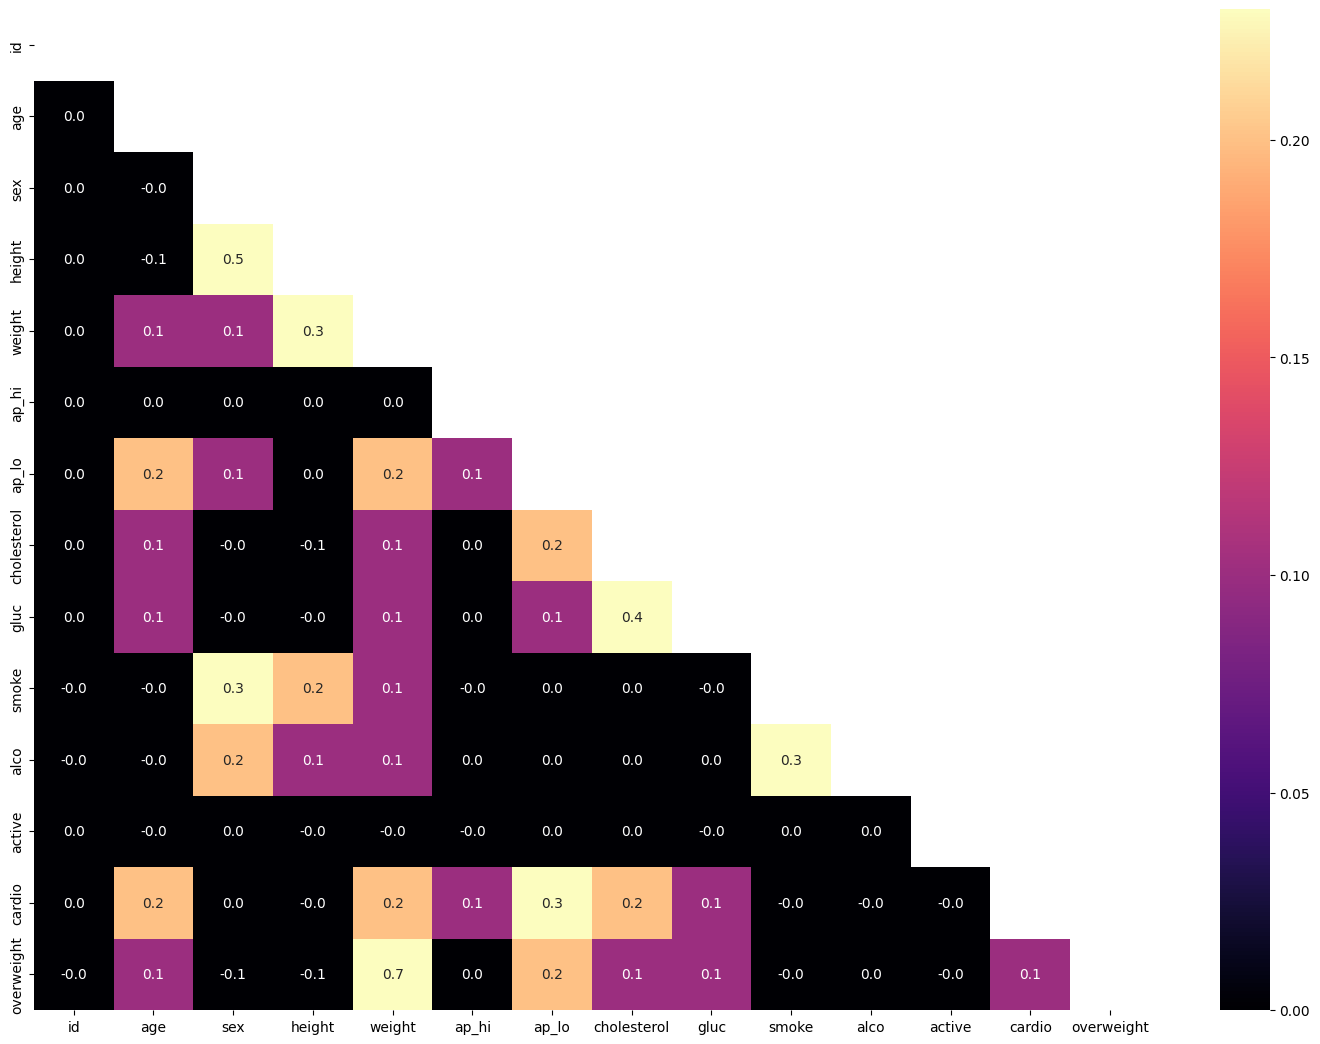

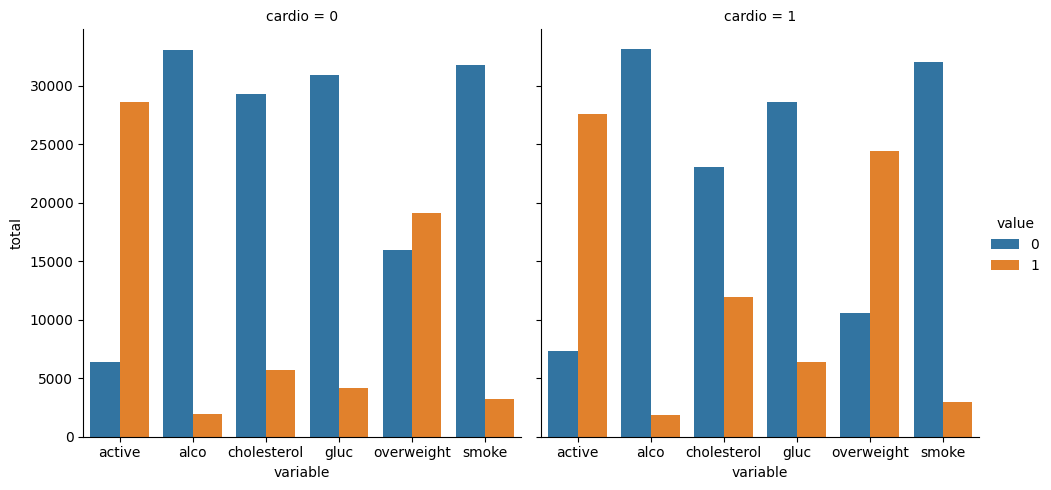

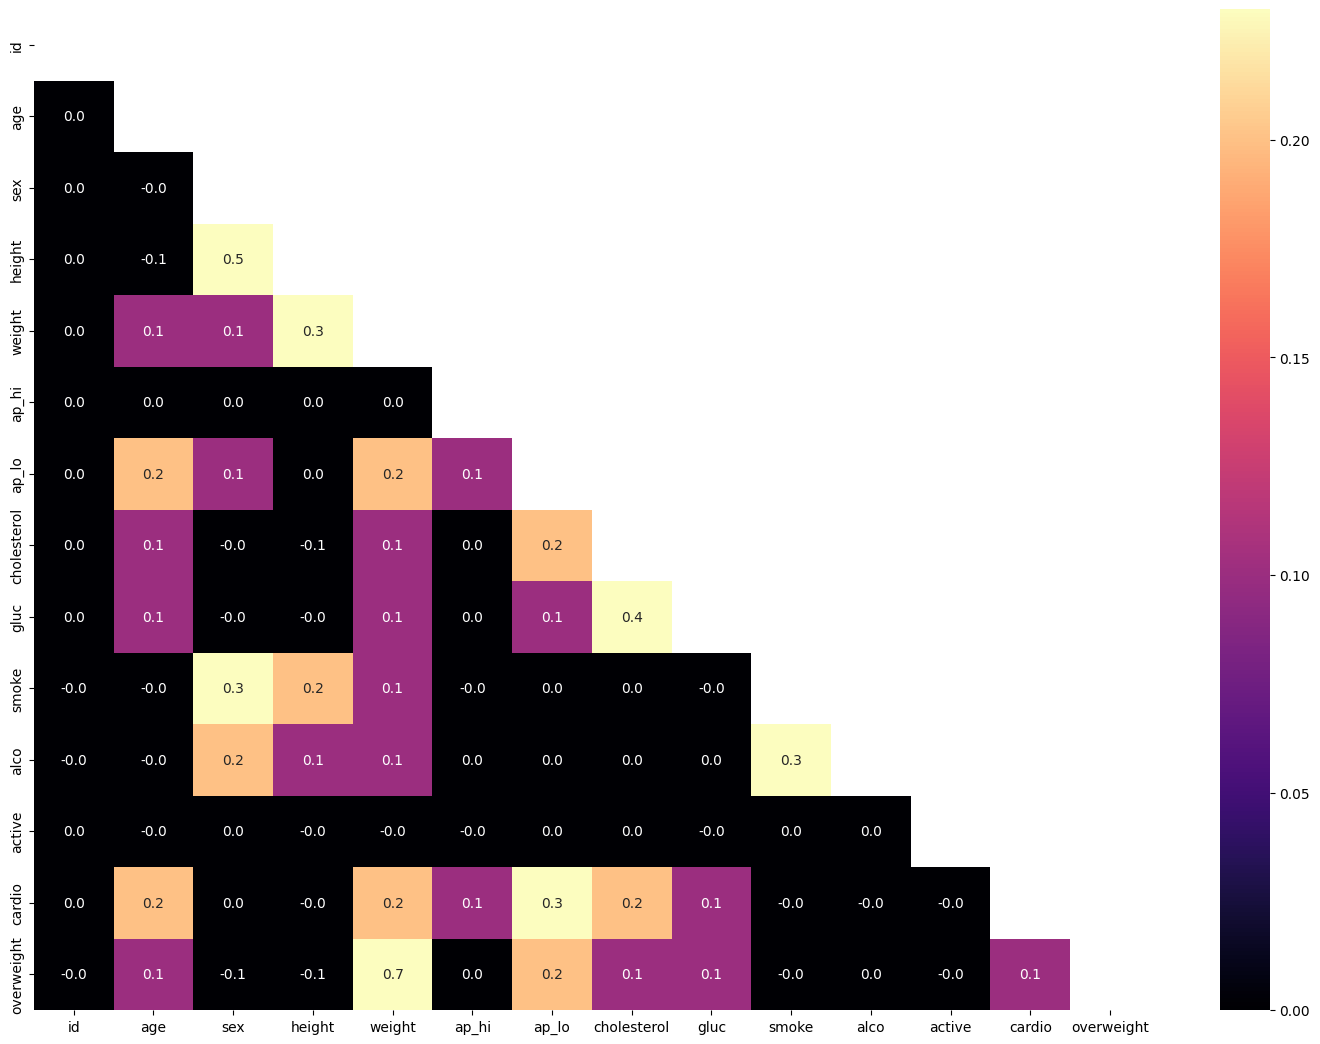

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1
df = pd.read_csv('medical_examination.csv')

# 2
df['overweight'] = ((df['weight']/((df['height']/100)**2))>25).astype(int)

# 3
df['cholesterol'] = df['cholesterol'].map({1:0,2:1,3:1})

df['gluc'] = df['gluc'].map(lambda x: 0 if x ==1 else 1)


# 4
def draw_cat_plot():
    # 5
    df_cat = pd.melt(df, id_vars = ['cardio'], value_vars = ['active','alco','cholesterol','gluc','overweight','smoke'])


    # 6
    df_cat_counts = df_cat.groupby(['cardio', 'variable']).value_counts()
    

    # 7

    cat_plot = sns.catplot(x='variable', hue='value', col='cardio', data=df_cat, kind='count', height=5, aspect=1)

    # 8
    fig = cat_plot.fig
    cat_plot.set_ylabels("total")

    # 9
    fig.savefig('catplot.png')
    return fig


# 10
def draw_heat_map():
    # 11
    df_heat = df[(df['ap_lo'] <= df['ap_hi']) & 
        (df['height'] >= df['height'].quantile(0.025)) & 
        (df['height'] <= df['height'].quantile(0.975)) & 
        (df['weight'] >= df['weight'].quantile(0.025)) & 
        (df['weight'] <= df['weight'].quantile(0.975))]

    # 12
    corr = df_heat.corr().round(1)

    # 13
    mask = np.triu(np.ones_like(corr, dtype=bool))



    # 14
    fig, ax =  plt.subplots(figsize=(18, 13))

    # 15
    sns.heatmap(corr, annot=True, fmt=".1f", cmap="magma", vmin=0, vmax=0.23, mask=mask, ax=ax)


    # 16
    fig.savefig('heatmap.png')
    return fig

draw_cat_plot()
draw_heat_map()